 <a id="notations"></a>

<font face="Cambria" font color='brown' font size=6>**Assignment 5-  Packed Absorption Column**

<font face="Cambria" font color='red' font size=4>**Aim** :
    <font color='blue'><font size='3'> 1. To solve the boundary value problem of 2-gases absorbing in a liquid in a packed column <br>
   <font color='blue'>  2. Plot the mole fraction profile as a function of height in the packed absorption column
     </font>

<img src=https://upload.wikimedia.org/wikipedia/commons/0/01/Anelli_Raschig.jpg width=300>

<p style="font-family:times new roman; font-size:20px"><font color="orange"> Firstly let's have a look inside the column

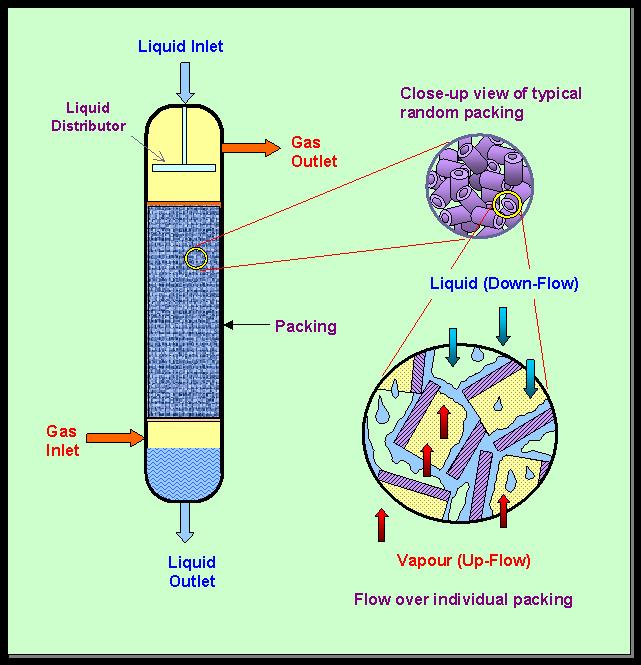

In [28]:
from IPython.display import Image
Image(filename="Packed.gif",width=400,height=400) 

<font face="Cambria" font color='green' font size=4> **Before we move on, let's have a look at the Assumptions:**

* Entire column operates at a constant temperature of $25^o C$ and 1 atm pressure.
* No heats effects are involved.
* No reaction taking place.
* Henry's constant doesn't vary with concentration.

<font face="Cambria" font color='dark orange' font size=5> This Animation will clear your idea about absorption column:

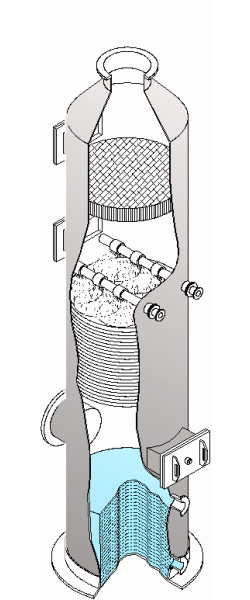

<font face="Cambria" font color='dark orange' font size=4> Mass Balance in a differential volume for counter current system:

$$
{d(N_{Gi})\over dz}={d(N_{Li})\over dz}
$$

* 1 = Nitrogen
* 2 = Water
* 3 = Methane
* 4 = butane

<p style="font-family:times new roman; font-size:20px"><font color="orange">The notations used to denote various quantities have been mentioned as follows:</font> </p>

\begin{align}
z &: Any\,General\,Height\,along\,the\, column\\
N_{Gi} &: moles\,of\, the\,gas\,phase\, at\,some\, height(z)\,in\,the\, column\\
N_{Li} &: moles\,of\, the\,liquid\,phase\,at\, some\, height(z)\,in\,the\, column\\
xi &: mole-fraction\,of\, the\,component-i\,in\,liquid\,phase\,at\, height(z)\,in\,the\, column\\
yi &: mole-fraction\,of\, the\,component-i\,in\,gas\,phase\,at\, height(z)\,in\,the\, column\\
x1i &: Intrefacial\,mole-fraction\,of\, the\,liquid-1\,in\,the\, column\\
x2i &: Interfacial\,mole-fraction\,of\, the\,liquid-2\,in\,the\, column\\
a &: Interfacial\, Area\,in\, {m2}\\
S &: Surface\,Area\,of\, the\,Column\\
P &: Pressure\, of\, Operation\\
T &: Temperature\, of\, Operation\\
Gs &: Career\,Gas\,Flow\,Rate\, (mol/s)\\
Ls &: Water\,Flow\,Rate\, (mol/s)\\
k_{La} &: Liquid \,Side\,Mass\,Transfer\,Coefficient\, in\, {mole\over s*m2}\\
k_{Ga} &: Gas \,Side\,Mass\,Transfer\,Coefficient\, in\, {mole\over s*m2}\\
Hi &: Henry\,Constant \,for\, Gas-i \\
\end{align}

<img src=https://qph.fs.quoracdn.net/main-qimg-8a8000f592f91a42dd8ee6ed471176dd width=300>

<font face="Cambria" font color='blue' font size=4> Differential equations obtained by mass balance:



$$ 
{d(N_{Gi}) \over dz} = {-k_Ga \over RT}[P_i-P_i^s(T)]  
$$

<font face="Cambria" font color='dark orange' font size=4> For nitrogen gas the mass transfer rate can be written as:


$$
{d(N_{Gi})\over dz} = {-k_Ga\over RT} [P_i-H_ix_i]
$$


where,
$$
P_i =P y_i =P{ N_{Gi} \over { \Sigma_{j=1}^n N_{Gj}} }
$$

$$
x_i = {N_{Li}\over {\Sigma_{j=1}^n N_{Lj} }}$$

<font face="Cambria" font color='dark orange' font size=4>  Vapour Pressure temperature corelation:

$$
ln(P) = c_1+{c_2 \over T} + c_3 lnT+c_4T^{c_5}
$$
P in Pa and T in K

|Component|$c_1$|$c_2$|$c_3$|$c_4$|$c_5$|
|:---|:--:|:--:|:--:|:--:|--:|
|Water|73.649|-7258.2|-7.3037|$4.1653 * 10^-{6}$|2|
|methane|83.107|-6486.2|-9.2194|$6.9844 * 10^{-6}$|2|
|butane|76.945|-6729.8|-8.179|$5.3017 * 10^{-6}$|2|

<font face="Cambria" font color='dark orange' font size=4> Henry's Constant corelation:

$$
ln(x) = A+ {B \over T}+ C lnT+DT
$$

$$
H={1 \over x}
$$
* T in K
* H in atm 
* x= mole fraction of solute in water at soltue partial pressure of 1 atm


|Component|A|B|C|D|
|:---|:--:|:--:|:--:|:--:|
|Nitrogen|-181.587|8632.13|24.7981|0|


In [29]:
import scipy
import scipy.integrate as scint
import scipy.optimize as scopt
import matplotlib.pyplot as plt
import pandas as pd
pi=scipy.pi
e=scipy.e

In [30]:
#Operating Parameters:
T=25+273.16 #K
P=101325 #Pa
#1=Nitrogen,2(matrix index=0)=Water,3(matrix index=1)=methane,4(matrix index=2)=butaned
#Data for vapour Pressure:
#ln(P)=c1+c2/T+c3lnT+c4*T^c5
c1=[73.649,83.107,76.945]
c2=[-7258.2,-6486.2,-6729.8]
c3=[-7.3037,-9.2194,-8.179]
c4=[4.1653e-6,6.9844e-6,5.3017e-6]
c5=[2,2,2]
R=8.314472
#Data for Henry's constant:
A=-181.587
B=8632.13
C=24.7981
D=0
H=e**(-1*(A+B/T+C*scipy.log(T)+D*T))*101325
G=30 #mol/s
L=50 #mol/s
Ng1i=100 #mol/s
Ng2i=0
Ng3i=10
Ng4i=10
Nl1i=0
Nl2i=50
Nl3i=0
Nl4i=0
Di=0.5 #column diamter in m
Qg=(Ng1i*28+Ng2i*18+Ng3i*78+Ng4i*92)/(1.184*1e3)
ug=Qg/(0.25*pi*Di**2)
ka=0.0269*ug**0.82
Z=10

In [31]:
# To find vapour Pressure:
def vp(v):
    return e**(c1[v]+c2[v]/T+c3[v]*scipy.log(T)+c4[v]*T**c5[v])

    

In [32]:
def model(SV,z,obj):
    e=obj.e
    Di=obj.Di
    L=obj.L
    G=obj.G
    P=obj.P
    T=obj.T
    H=obj.H
    Z=obj.Z
    A=obj.A
    B=obj.B
    C=obj.C
    D=obj.D
    [Ng1,Ng2,Ng3,Ng4,Nl1,Nl2,Nl3,Nl4]=SV
    dNg1bydz=-ka/(R*T)*(P*Ng1/(Ng1+Ng2+Ng3+Ng4)-H*Nl1/(Nl1+Nl2+Nl3+Nl4))
    dNg2bydz=-ka/(R*T)*(P*Ng2/(Ng1+Ng2+Ng3+Ng4)-vp(0))
    dNg3bydz=-ka/(R*T)*(P*Ng3/(Ng1+Ng2+Ng3+Ng4)-vp(1))
    dNg4bydz=-ka/(R*T)*(P*Ng4/(Ng1+Ng2+Ng3+Ng4)-vp(2))
    dNl1bydz=ka/(R*T)*(P*Ng1/(Ng1+Ng2+Ng3+Ng4)-H*Nl1/(Nl1+Nl2+Nl3+Nl4))
    dNl2bydz=-ka/(R*T)*(P*Ng2/(Ng1+Ng2+Ng3+Ng4)-vp(0))
    dNl3bydz=-ka/(R*T)*(P*Ng3/(Ng1+Ng2+Ng3+Ng4)-vp(1))
    dNl4bydz=-ka/(R*T)*(P*Ng4/(Ng1+Ng2+Ng3+Ng4)-vp(2))
    return [dNg1bydz,dNg2bydz,dNg3bydz,dNg4bydz,dNl1bydz,dNl2bydz,dNl3bydz,dNl4bydz]


### <font color='Orange'>Here comes the important part of the code!

In [33]:
def get_boundary_residuals(SV0,obj):
    z=scipy.array([0,obj.Z])
    trial_solution = scint.odeint(model, SV0, z, args = (obj,))
    SVi = trial_solution[0]
    SVb = trial_solution[-1]
    error = []
    k = 0
    for ic in obj.initial_conditions:
        error.append(ic - SVi[k])
        k += 1
    for bc in obj.boundary_conditions:
        error.append(bc - SVb[k])
        k += 1
    return error

In [34]:
class absorption:
    def __init__(self):
        self.e=2.718281828
        self.L=50
        self.G=50
        self.Di=0.5
        self.Z=10
        self.T=25+273.16
        self.P=101325
        self.A=-181.587
        self.B=8632.13 
        self.C=24.7981
        self.D=0
        self.H=e**(-1*(A+B/T+C*scipy.log(T)+D*T))*101325
        self.Ng1i=30
        self.Ng2i=0
        self.Ng3i=10
        self.Ng4i=10
        self.Nl1i=0
        self.Nl2i=50
        self.Nl3i=0
        self.Nl4i=0
    def solve(self):
        self.x=scipy.linspace(0,Z,10)
        self.initial_conditions=[self.Ng1i,self.Ng2i,self.Ng3i,self.Ng4i]
        self.boundary_conditions=[self.Nl1i,self.Nl2i,self.Nl3i,self.Nl4i]
        SV0=self.initial_conditions+self.boundary_conditions
        shooting_method_solution = scopt.least_squares(get_boundary_residuals,
                                                          SV0,args = (self,))
        SV0=shooting_method_solution.x
        self.solution = scint.odeint(model, SV0,self.x,args = (self,))
        self.solution=pd.DataFrame({
                "h(m)":self.x,
                "Ng1":self.solution[:,0],
                "Ng2":self.solution[:,1],
                "Ng3":self.solution[:,2],
                "Ng4":self.solution[:,3],
                "Nl1":self.solution[:,4],
                "Nl2":self.solution[:,5],
                "Nl3":self.solution[:,6],
                "Nl4":self.solution[:,7],
        }
        )
    def plot(self):
        fig = plt.figure()
        ay = fig.add_subplot(121)
        ay.plot(self.solution["h(m)"],self.solution["Ng1"],'r',label="Nitrogen")
        ay.plot(self.solution["h(m)"],self.solution["Ng2"],'g',label="Water")
        ay.plot(self.solution["h(m)"],self.solution["Ng3"],'b',label="Methane")
        ay.plot(self.solution["h(m)"],self.solution["Ng4"],'y',label="Butane")
        ay.legend()
        ay.title.set_text("Flow rates in the gas phase")
        ay.xaxis.label.set_text("Height of column")
        ay.yaxis.label.set_text("Flow rates(mol/s)")
        
        
        ax = fig.add_subplot(122)
        ax.plot(self.solution["h(m)"],self.solution["Nl1"],'r',label="Nitrogen")
        ax.plot(self.solution["h(m)"],self.solution["Nl2"],'g',label="Water")
        ax.plot(self.solution["h(m)"],self.solution["Nl3"],'b',label="Methane")
        ax.plot(self.solution["h(m)"],self.solution["Nl4"],'y',label="Butane")
        ax.legend()
        ax.title.set_text("Flow rates in the liquid phase")
        ax.xaxis.label.set_text("Height of column")
        ax.yaxis.label.set_text("Flow rates(mol/s)")

In [35]:
ccgas=absorption()
ccgas.Z=10

In [36]:
ccgas.solve()

<font face="Cambria" font color='Purple' font size=4>**Let's Tabulate the values:**

In [37]:
ccgas.solution

,h(m),Ng1,Ng2,Ng3,Ng4,Nl1,Nl2,Nl3,Nl4
0,0.000000,30.000000,7.108420e-10,10.000000,10.000000,3.867541,48.686439,4.066317e+00,7.726738e+00
1,1.111111,33.867089,3.814824e-01,9.206085,8.143031,0.000452,49.067921,3.272402e+00,5.869769e+00
2,2.222222,33.867087,6.695744e-01,8.512054,6.646191,0.000454,49.356013,2.578371e+00,4.372930e+00
3,3.333333,33.867086,8.819584e-01,7.914969,5.457268,0.000456,49.568397,1.981286e+00,3.184007e+00
4,4.444444,33.867084,1.034739e+00,7.408916,4.525470,0.000457,49.721179,1.475233e+00,2.252208e+00
5,5.555556,33.867083,1.141904e+00,6.985825,3.803750,0.000458,49.828343,1.052142e+00,1.530489e+00
6,6.666667,33.867082,1.215084e+00,6.636367,3.250366,0.000459,49.901523,7.026839e-01,9.771050e-01
7,7.777778,33.867081,1.263587e+00,6.350778,2.829615,0.000460,49.950026,4.170949e-01,5.563536e-01
8,8.888889,33.867080,1.294613e+00,6.119510,2.511890,0.000461,49.981052,1.858271e-01,2.386285e-01
9,10.000000,33.867080,1.313561e+00,5.933683,2.273262,0.000462,50.000000,-1.324606e-08,-4.437697e-09


### <font color='red'> Are you ready to plot the graphs?

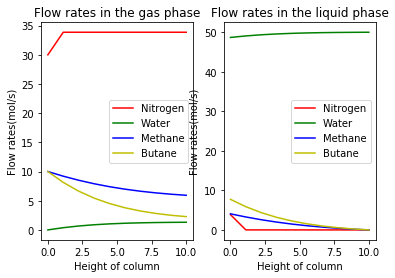

In [38]:
ccgas.plot()

<font face="Cambria" font color='dark orange' font size=5> **So what do we Conclude?**

* The amount of Nitrogen in gas phase shows very little change in amount as the solubility of Nitrogen in water is very small
* Some amount of water also gets evaporated and enters the gas phase
* Toluene and benzene gases get absorbed by water depending upon their respective solubilities

## <font color='blue'> Do you wanna Strengthen your grip on Gas absorption ?
<br> <b><p style="font-family:georgia ; color:red" > Here's a NPTEL Video that will sharpen your gas absorption concepts, Check it out!</p></b>

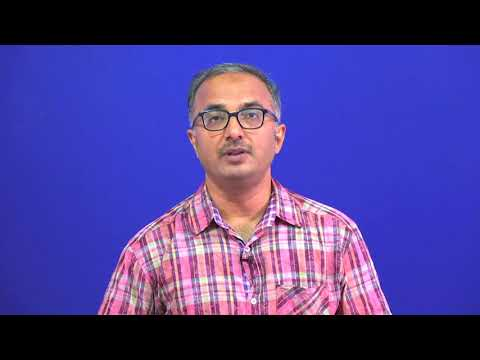

In [39]:
from IPython.display import YouTubeVideo
YouTubeVideo(id='3vilmUN9Qls',width=500,height=300)

## <font color='Red'>Here's an interesting report.
<font color='blue'><font size='3'> Do check this out!

In [40]:
from IPython.display import IFrame
IFrame("https://ericthenderson.com/wp-content/uploads/2017/02/Packed-Tower-Final-Report-Blanked.pdf", width=600, height=300)

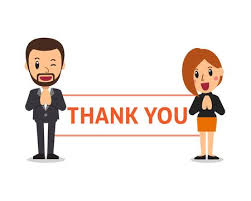

In [41]:
from IPython.display import Image
Image(filename="Thanks.jpg",width=600,height=600) 

### <font color='green'>Prepared by :- Apurva Pawar & Amitkumar Chauhan 
    

<font color='red'>*To Revisit the entire experience or to move to the top* </font>[Click here](#notations)
